# 🦘 Possum Ecology Analysis - Data Science Project

Welcome to the project! In this notebook, we analyze the morphometric data of brushtail possums to:

- Predict possum **age** (Linear Regression)
- Classify possum **sex** (Logistic Regression)
- Classify **trapping site** (KNN)

We'll use Python's standard data science libraries.

In [1]:
# 📥 Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    r2_score, mean_squared_error, mean_absolute_error,
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
)

In [2]:
df = pd.read_csv('possum.csv')
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [3]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [4]:
# 🧹 Preprocessing
df['age'] = df['age'].fillna(df['age'].mean())
df['footlgth'] = df['footlgth'].fillna(df['footlgth'].mean())
df['sex'] = df['sex'].map({'m': 1, 'f': 0})
df = pd.get_dummies(df, columns=['Pop', 'site'], drop_first=True)

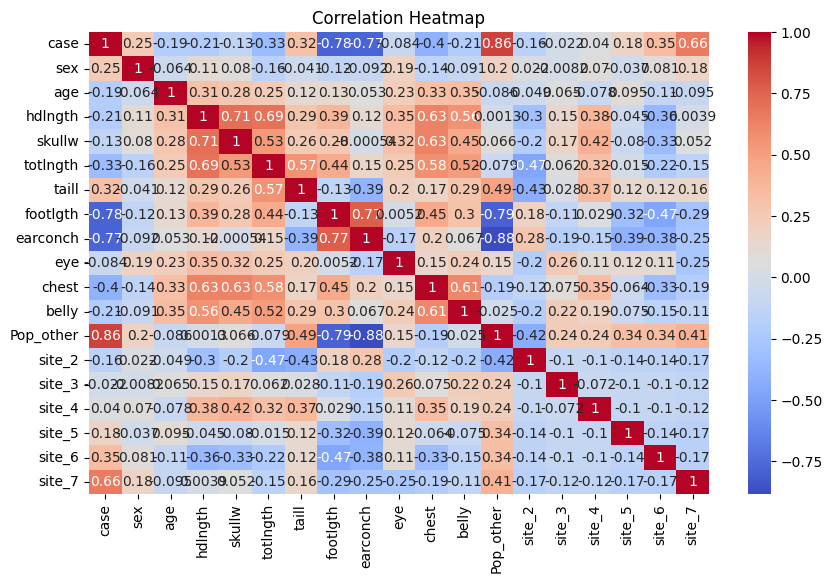

In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [7]:
# Linear Regression: Predict Age
X_age = df.drop(columns=['age', 'case'])
y_age = df['age']
X_train, X_test, y_train, y_test = train_test_split(X_age, y_age, test_size=0.2, random_state=42)
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)
print("RMSE:", mean_squared_error(y_test, y_pred) ** 0.5)
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

RMSE: 2.27487373198398
R²: -0.1511391257351502
MAE: 1.656139314152923


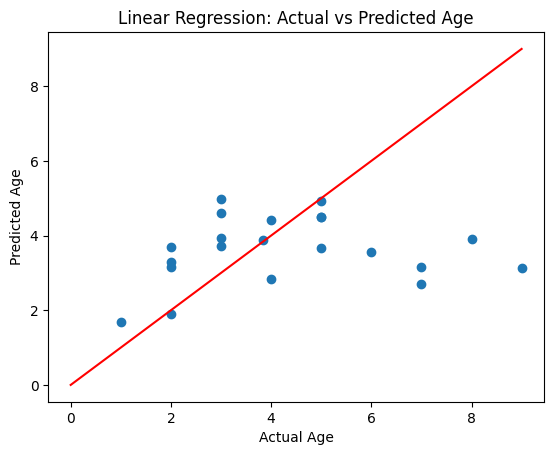

In [8]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("Linear Regression: Actual vs Predicted Age")
plt.plot([0, max(y_test)], [0, max(y_test)], color='red')
plt.show()

In [9]:
# Logistic Regression: Classify Sex
X_sex = df.drop(columns=['sex', 'case'])
y_sex = df['sex']
scaler = StandardScaler()
X_sex_scaled = scaler.fit_transform(X_sex)
X_train, X_test, y_train, y_test = train_test_split(X_sex_scaled, y_sex, test_size=0.2, random_state=42)
model_logreg = LogisticRegression()
model_logreg.fit(X_train, y_train)
y_pred = model_logreg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

Accuracy: 0.6666666666666666
Precision: 0.6875
Recall: 0.8461538461538461
F1-score: 0.7586206896551724


In [10]:
# KNN Classification: Classify Sex
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_knn_pred = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_knn_pred))

KNN Accuracy: 0.5714285714285714


In [12]:
# KNN Regression: Predict Age (optional)
# KNN Regression: Predict Age (optional)
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_knn_reg_pred = knn_reg.predict(X_test)

# Calculate RMSE manually
mse = mean_squared_error(y_test, y_knn_reg_pred)
rmse = mse ** 0.5
print("KNN RMSE:", rmse)


KNN RMSE: 0.48403069560278333


## 📌 Conclusion & Next Steps
- Linear Regression worked for age prediction
- Logistic Regression & KNN both usable for classifying sex
- Further work: Try classification by site, use PCA or Random Forests for comparison

Keep exploring ecological insights! 🌿